# Iris Dataset Notebook 

The purpose of this notebook is to explain the famous iris data set and include why it is difficult to write an algorithm to separate the three classes 
of iris based on the variables in the dataset.

## What is the Iris Data Set

The Iris data set is probably the best know dataset to be found in pattern recognition literature and is used widely by everyone trying to learn machine learning and statistics. The dataset was compiled by [Ronald Fisher](https://en.wikipedia.org/wiki/Ronald_Fisher), a British statistician and biologist in the 1930s. The overall goal is to classify iris flowers among three class.

![image](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png)

Each class contains three subclasses of fifty instances each, where each class refers to a type of iris plant. Four features were measured from each sample

- Sepal Width
- Sepal Height
- Petal Width
- Petal Height

One reason why it is difficult to write an algoritm to separate the three classes of iris based on the variables in the dataset is because us as humans can't process or visualise the data by just looking at the csv. We have to use packages like pandas or seaborn to help visualise the data so we can then create an alogithm to seperate the data. 
Below I will deminstate how to read the dataset into memory, visualize the datat and then use the 

## Reading Data Set

In [1]:
# Importing pandas
import pandas as pd
import numpy as np
import requests
import re
import seaborn as sb
import matplotlib.pyplot as plt

#### Load data set into memory

In [2]:
# Load the iris data set from a Url
df = pd.read_csv("https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv")

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


To visualize the three species and four different features of iris flower I will use seaborn.  

In [4]:
# Plot the data set

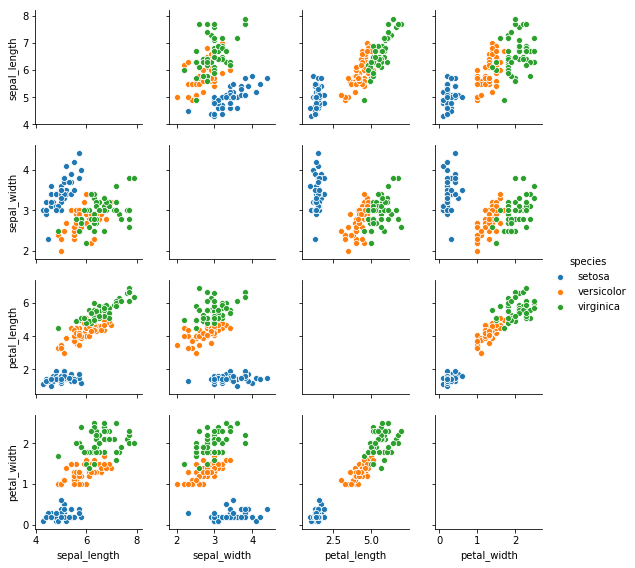

In [5]:
sb.pairplot(df, hue="species", height=2, diag_kind="kds")
plt.show()

We now need to convert of categorical variables into a form that can be read by our our ML algorithm to improve the prediction

In [6]:
from sklearn.preprocessing import LabelBinarizer
species_lb = LabelBinarizer()
Y = species_lb.fit_transform(df.species.values)

To impove gradient descent, we will normalize the values utilizing the normalize class from scikit learn.X_data variable will contain our normalized features will use to train our neural network.

In [12]:
from sklearn.preprocessing import normalize
FEATURES = df.columns[0:4]
X_data = df[FEATURES].as_matrix()
X_data = normalize(X_data)

C:\Users\Kevin Delassus\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, Y, test_size=0.3, random_state=1)
X_train.shape

(105, 4)

We will now define our Tensorflow model 

In [33]:
import tensorflow as tf

# Parameters
learning_rate = 0.01
training_epochs = 5

Now we will define the number of features and number of classes which are required to define the shape of our vectors. For our dataset, inputs will be 4 and classes will be 3.

In [34]:
# Neural Network Parameters
n_hidden_1 = 256 # 1st layer number of neurons
n_hidden_2 = 128 # 1st layer number of neurons
n_input = X_train.shape[1] # input shape (105, 4)
n_classes = y_train.shape[1] # classes to predict

Now to define our tensors

In [35]:
# Inputs
X = tf.placeholder("float", shape=[None, n_input])
y = tf.placeholder("float", shape=[None, n_classes])

# Dictionary of Weights and Biases
weights = {
  'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
  'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
  'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}

biases = {
  'b1': tf.Variable(tf.random_normal([n_hidden_1])),
  'b2': tf.Variable(tf.random_normal([n_hidden_2])),
  'out': tf.Variable(tf.random_normal([n_classes]))
}

Forward Propagation

In [36]:
# Model Forward Propagation step
def forward_propagation(x):
    # Hidden layer1
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)

    # Output fully connected layer
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out'] 
    return out_layer


# Model Outputs
yhat = forward_propagation(X)
ypredict = tf.argmax(yhat, axis=1)

Backward Propagation

In [37]:
# Backward propagation
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=yhat))
optimizer = tf.train.GradientDescentOptimizer(learning_rate)
#optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)

train_op = optimizer.minimize(cost)


Now to train the Neural Network

In [41]:
# Initializing the variables
init = tf.global_variables_initializer()

from datetime import datetime
startTime = datetime.now()

with tf.Session() as sess:
    sess.run(init)
    
    #writer.add_graph(sess.graph)
    #EPOCHS
    for epoch in range(training_epochs):
        #Stochasting Gradient Descent
        for i in range(len(X_train)):
            summary = sess.run(train_op, feed_dict={X: X_train[i: i + 1], y: y_train[i: i + 1]})
        
        train_accuracy = np.mean(np.argmax(y_train, axis=1) == sess.run(ypredict, feed_dict={X: X_train, y: y_train}))
        test_accuracy  = np.mean(np.argmax(y_test, axis=1) == sess.run(ypredict, feed_dict={X: X_test, y: y_test}))
                
        print("Epoch = %d, train accuracy = %.2f%%, test accuracy = %.2f%%" % (epoch + 1, 100. * train_accuracy, 100. * test_accuracy))
        #print("Epoch = %d, train accuracy = %.2f%%" % (epoch + 1, 100. * train_accuracy))

    sess.close()
print("Time taken:", datetime.now() - startTime)

Epoch = 1, train accuracy = 69.52%, test accuracy = 60.00%
Epoch = 2, train accuracy = 90.48%, test accuracy = 93.33%
Epoch = 3, train accuracy = 94.29%, test accuracy = 95.56%
Epoch = 4, train accuracy = 91.43%, test accuracy = 93.33%
Epoch = 5, train accuracy = 92.38%, test accuracy = 95.56%
Time taken: 0:00:00.383196
